In [1]:
import os
import numpy as np
import pickle as pkl
from os.path import join as pjoin
from matplotlib import pyplot as plt
from cxy_visual_dev.lib.predefine import proj_dir

anal_dir = pjoin(proj_dir, 'analysis')
work_dir = pjoin(anal_dir, 'plot/plot_decomposition')
if not os.path.isdir(work_dir):
    os.makedirs(work_dir)

# plot_explained_var

In [2]:
def plot_explained_var(pca_file, components=None, figsize=None, out_file=None):
    pca = pkl.load(open(pca_file, 'rb'))
    if components is None:
        components = np.arange(pca.n_components) + 1
    else:
        components = np.array(components)
    n_component = len(components)

    plt.figure(figsize=figsize)
    x = np.arange(n_component)
    y = pca.explained_variance_ratio_[components-1]
    xticklabels = [f'C{i}' for i in components]
    plt.plot(x, y)
    plt.xticks(x, xticklabels)
    plt.title(os.path.basename(pca_file).split('.')[0])
    plt.xlabel('component')
    plt.ylabel('explained_variance_ratio')
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.tight_layout()
    if out_file is None:
        plt.show()
    else:
        plt.savefig(out_file)

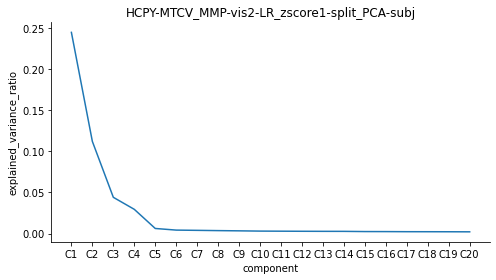

In [3]:
plot_explained_var(
    pca_file=pjoin(anal_dir, 'decomposition/HCPY-MTCV_MMP-vis2-LR_zscore1-split_PCA-subj.pkl'),
    components=None, figsize=(7, 4),
    out_file=pjoin(work_dir, 'HCPY-MTCV_MMP-vis2-LR_zscore1-split_PCA-subj.jpg')
)

# plot sum of square across columns for each row

In [4]:
def plot_sum_square(data, components, figsize, out_file):
    if components == 'all':
        components = np.arange(data.shape[0]) + 1
    else:
        components = np.asarray(components)
    n_component = len(components)

    plt.figure(figsize=figsize)
    x = np.arange(n_component)
    y = np.sum(data[components-1]**2, 1)
    sorted_indices = np.argsort(y)[::-1]
    y = y[sorted_indices]
    components = components[sorted_indices]
    xticklabels = [f'C{i}' for i in components]
    plt.plot(x, y)
    plt.xticks(x, xticklabels)
    plt.title(os.path.basename(out_file).split('.')[0])
    plt.xlabel('component')
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.tight_layout()
    if out_file is None:
        plt.show()
    else:
        plt.savefig(out_file)

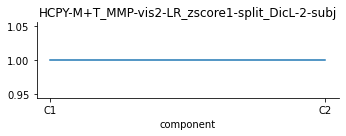

In [7]:
fpath = pjoin(anal_dir, 'decomposition/HCPY-M+T_MMP-vis2-LR_zscore1-split_DicL-2-subj.pkl')
plot_sum_square(
    data=pkl.load(open(fpath, 'rb')).components_, components='all', figsize=(5, 2),
    out_file=pjoin(work_dir, 'HCPY-M+T_MMP-vis2-LR_zscore1-split_DicL-2-subj.jpg')
)

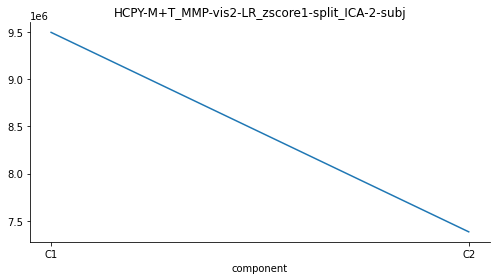

In [8]:
fpath = pjoin(anal_dir, 'decomposition/HCPY-M+T_MMP-vis2-LR_zscore1-split_ICA-2-subj.pkl')
plot_sum_square(
    data=pkl.load(open(fpath, 'rb')).mixing_.T, components='all', figsize=(7, 4),
    out_file=pjoin(work_dir, 'HCPY-M+T_MMP-vis2-LR_zscore1-split_ICA-2-subj.jpg')
)